蔵本モデル:
$$\dot{\theta_{i}} = \omega_{i} + \frac{K}{N}\sum_{i=1}^{N}\sin(\theta_{j}-\theta_{i}),\ \ \ i=1,2,\dots ,N$$
振動子の数$N$を自分で設定した値で行うことができるようにする。

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.html.widgets import interactive
from IPython.html import widgets
from IPython.display import display
import numpy as np
import random

pi = np.pi
sin = np.sin
exp = np.exp
arr = np.array

rand = random.random
gauss = random.gauss

h = 0.01

def pipi(rad):
    return (rad + pi) % (2*pi) - pi

def master(after, widget=True, parameter=None):
    
    def main(params):
        """params 内訳
        [theta], [vel], (omega), K, T
        """
        theta = [[th,] for th in params[0]] # theta time series
        current = params[0] # theta in a time
        N = len(theta)
        vel = [[v,] for v in params[1]]
        omega = arr(params[2])
        K = params[3]
        T = params[4]
        t = 1
        while t < T:
            for i, th in enumerate(current):
                ans = th + vel[i][-1]*h
                theta[i].append(ans)
                current[i] = ans
            # calcurate by matrix
            V = omega + (K/float(N))*np.sum(sin(arr([current]*N)-arr([current]*N).T), axis=1)
            for i, v in enumerate(vel):
                v.append(V[i])
            t += 1
        result = [theta, vel, omega, K, T]
        return after(*result)
    
    # assgin values
    def assign(N=10, mu=0., sigma=0.5, K=0.9, T=300):
        global params
        params = [N, mu, sigma, K, T]
    
    if widget:
        var = {
            "N": (5, 100, 5),
            "mu": (-2., 2., 0.01),
            "sigma": (0., 4., 0.01),
            "K": (-4., 4., 0.1),
            "T": (50, 2000, 50),
        }

        # Put Widgets
        w = interactive(assign, **var)
        button = widgets.Button(description="Click Me!")
        display(w)
        display(button)

        def on_button_clicked(b):
            print("Simulation Start...")
            print("param {0}".format(params))
            
            N, mu, sigma, K, T = params
            
            # generate theta and vel by random number
            theta = [rand()*2*pi-pi for i in range(N)]
            vel = [rand()*4.-2. for i in range(N)]

            # generate omega
            omega = tuple([gauss(mu, sigma) for i in range(N)])
            parameter = [theta, vel, omega, K, T]
            main(parameter)

        button.on_click(on_button_clicked)
    else:
        return main(parameter)

Simulation Start...
param [10, 0.0, 0.5, 1.2, 2000]


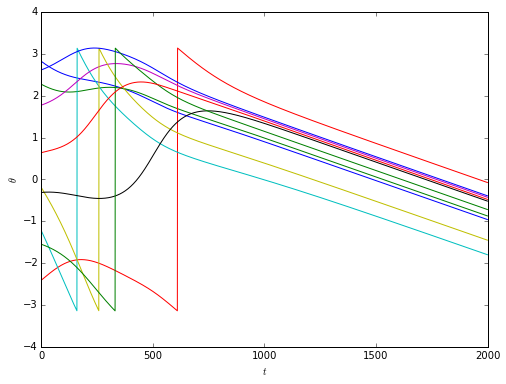

In [5]:
def simple_plot(theta, vel, omega, K, T):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    for th in theta:
        ax.plot(range(T), map(pipi, th))
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$\theta$')
    plt.show()

master(simple_plot)

オーダーパラメーター(秩序変数)$R$

$$Re^{i\phi} = \frac{1}{N}\sum_{j=1}^{N} e^{i\theta_{j}}$$

$$R = \left| \frac{1}{N} \sum_{j=1}^{N} e^{i\theta_{j}} \right|$$

Simulation Start...
param [10, 0.0, 0.5, 0.9, 2000]


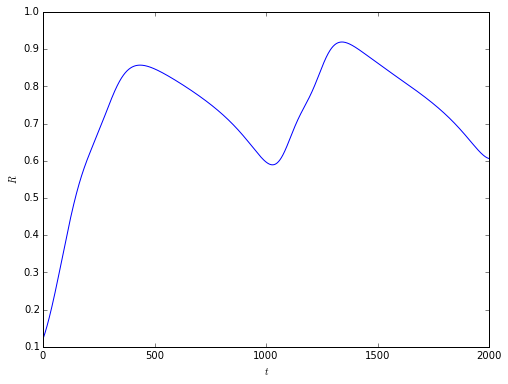

In [6]:
def order_parameter2(theta, vel, omega, K, T):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    itheta = arr([[1j*t for t in th] for th in theta])
    R = abs(np.sum(exp(itheta),axis=0)/float(len(omega)))
    ax.plot(range(T), R)
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$R$')
    plt.show()

master(order_parameter2)

In [8]:
def K_R():
    # assgin values
    def assign2(N=50, mu=0., sigma=0.5, Kmax=2., T=1000):
        global params2
        params2 = [N, mu, sigma, Kmax, T]
    
    var = {
        "N": (5, 100, 5),
        "mu": (-2., 2., 0.01),
        "sigma": (0., 4., 0.01),
        "Kmax": (0., 4., 0.1),
        "T": (1000, 100000, 1000),
    }

    # Put Widgets
    w = interactive(assign2, **var)
    button = widgets.Button(description="Click Me!")
    display(w)
    display(button)

    def on_button_clicked2(b):
        print("Simulation Start...")
        print("param {0}".format(params2))
        Rs = []
        N, mu, sigma, Kmax, T = params2
        K = np.linspace(0., Kmax, 100)
            
        for k in K:
            # generate theta and vel by random number
            theta = [rand()*2*pi-pi for i in range(N)]
            vel = [rand()*4.-2. for i in range(N)]

            # generate omega
            omega = tuple([gauss(mu, sigma) for i in range(N)])
            parameter = [theta, vel, omega, k, T]
            def after2(theta, vel, omega, K, T):
                itheta = arr([[1j*t for t in th] for th in theta])
                R = abs(np.sum(exp(itheta), axis=0)/float(len(omega)))
                return R[-1]

            Rs.append(master(after2, widget=False, parameter=parameter))

        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111)
        ax.plot(K, Rs)
        ax.set_xlabel(r'$K$')
        ax.set_ylabel(r'$R$')
        plt.show()

    button.on_click(on_button_clicked2)

In [9]:
K_R()

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/kernel/zmq/kernelbase.py", line 252, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/IPython/kernel/zmq/kernelbase.py", line 213, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/IPython/kernel/comm/manager.py", line 136, in comm_msg
    comm.handle_msg(msg)
  File "/usr/local/lib/python2.7/dist-packages/IPython/kernel/comm/comm.py", line 164, in handle_msg
    self._msg_callback(msg)
  File "/usr/local/lib/python2.7/dist-packages/IPython/html/widgets/widget.py", line 69, i